# Project Introduction
-   This project aims to apply data analysis techniques to a real-world dataset (Udemy Courses)obtained from Kaggle. Students will explore trends, identify insights, and potentially make recommendations for instructors or the Udemy platform itself

# Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import kagglehub

# Importing Data

In [64]:
df = pd.read_csv("D:/Courses/Data_Analysis/IMT/final_project/data/udemy_output_All_Finance__Accounting_p1_p626.csv")
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


# Explanatory Data Analysis (EDA)

## Inspecting the DataFrame

In [65]:
df.shape        ## This function returns the number of rows and columns of the dataset

(13608, 20)

In [66]:
df.info()       ## This function prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

### What does Every Feature hold and whether it is needed or not

###### **`id`** : The course ID of that particular course. 
---
###### **`title`** : Shows the unique names of the courses available under the development category on Udemy.
---
###### **`url`**: Gives the URL of the course. 
---
###### **`is_paid`** : Returns a boolean value displaying true if the course is paid and false if otherwise. 
---
###### **`num_subscribers`** : Shows the number of people who have subscribed that course.
---
###### **`avg_rating`** : Shows the average rating of the course.
---
###### **`avg rating recent`** : Reflects the recent changes in the average rating.
---
###### **`num_reviews`** : Gives us an idea related to the number of ratings that a course has received.
---
###### **`num_ published_lectures`** : Shows the number of lectures the course offers.
---
###### **`num_ published_ practice_tests`** : Gives an idea of the number of practice tests that a course offers. 
---
###### **`created`** : The time of creation of the course. 
---
###### **`published_time`** : Time of publishing the course.
---
###### **`discounted_ price_amount`** : The discounted price which a certain course is being offered at. 
---
###### **`discounted_ price_currency`** : The currency corresponding to the discounted price which a certain course is being offered at. 
---
###### **`price_ detail_amount`** : The original price of a particular course.
---
###### **`price_ detail_currency`** : The currency corresponding to the price detail amount for a course.
---

## Generating a summary for all the numerical values we have

In [67]:
df.describe()       ## This function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [68]:
df.nunique()        ## This function returns the number of unique values in each column.

id                              13608
title                           13563
url                             13608
is_paid                             2
num_subscribers                  4875
avg_rating                       1965
avg_rating_recent               11781
rating                          11781
num_reviews                      1285
is_wishlisted                       1
num_published_lectures            301
num_published_practice_tests        7
created                         13607
published_time                  13605
discount_price__amount             53
discount_price__currency            1
discount_price__price_string       53
price_detail__amount               37
price_detail__currency              1
price_detail__price_string         37
dtype: int64

## Dropping the unnecessary columns

In [69]:
df.drop(['url', 'is_wishlisted', 
         'discount_price__currency', 'discount_price__price_string',
         'avg_rating_recent','price_detail__price_string', 
         'num_published_practice_tests'], axis = 1, inplace = True)

df.head()

,id,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,created,published_time,discount_price__amount,price_detail__amount,price_detail__currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0,INR


## Renaming the Columns so it gives more insight to what data each column holds

In [70]:
df.rename({"title":"Title","avg_rating": "Average rating", 
        "rating":"Rating",
        "num_subscribers":"Subscribers", "published_time":"Time",
        "num_reviews": "Num reviews",
        "num_published_lectures":"Lectures",
        "discount_price__amount":"Discount price",
        "price_detail__amount":"Price", 
        "price_detail__currency": "Currency"}, axis = 1, inplace = True)
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0,INR


##  Checking the Data Formating

In [71]:
df.dtypes

id                  int64
Title              object
is_paid              bool
Subscribers         int64
Average rating    float64
Rating            float64
Num reviews         int64
Lectures            int64
created            object
Time               object
Discount price    float64
Price             float64
Currency           object
dtype: object

## Checking for Duplicated Values

In [72]:
df.duplicated().sum()       ## This function returns the number of duplicate rows in the DataFrame.

np.int64(0)

## Fixing the Date Format

In [ ]:
df["Time"] = pd.to_datetime(df["Time"])
df['created'] = pd.to_datetime(df['created'])       ## This function converts the argument to datetime.
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640.0,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640.0,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14+00:00,455.0,8640.0,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,8640.0,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,8640.0,INR


### Convert datetime columns to string format compatible with MySQL


In [74]:
df['created'] = df['created'].dt.strftime('%Y-%m-%d %H:%M:%S')      
df['Time'] = df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')            ## This function converts the argument to a string in the specified date format.
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48,2016-04-06 05:16:11,455.0,8640.0,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18,2016-08-23 16:59:49,455.0,8640.0,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48,2017-11-14 23:58:14,455.0,8640.0,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35,2016-01-21 01:38:48,455.0,8640.0,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46,2016-01-11 21:39:33,455.0,8640.0,INR


# Fixing the conversion rate for the price

### Convert currency to USD for consistency in analysis.


In [ ]:
conversion_rate = 0.0121817  # Example conversion rate (1 Rupee = 0.0121817 USD)
df['Price'] = df['Price'] * conversion_rate
df['Discount price'] = df['Discount price'] * conversion_rate    ## This function multiplies the argument by the conversion_rate to convert the currency to USD.
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48,2016-04-06 05:16:11,5.542674,105.249888,INR
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18,2016-08-23 16:59:49,5.542674,105.249888,INR
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48,2017-11-14 23:58:14,5.542674,105.249888,INR
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35,2016-01-21 01:38:48,5.542674,105.249888,INR
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46,2016-01-11 21:39:33,5.542674,105.249888,INR


### replacing the currency with USD 

In [ ]:
df['Currency'].replace("INR", "USD", inplace = True)        ## This function replaces the value 'INR' with 'USD' in the 'Currency' column.
df.head()

C:\Users\maraw\AppData\Local\Temp\ipykernel_17680\1661069966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Currency'].replace("INR", "USD", inplace = True)


,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48,2016-04-06 05:16:11,5.542674,105.249888,USD
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18,2016-08-23 16:59:49,5.542674,105.249888,USD
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48,2017-11-14 23:58:14,5.542674,105.249888,USD
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35,2016-01-21 01:38:48,5.542674,105.249888,USD
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46,2016-01-11 21:39:33,5.542674,105.249888,USD


## Adding a discount percentage column

In [ ]:
df['Discount Percentage'] = ((df['Price'] - df['Discount price']) / df['Price']) * 100      
df['Discount Percentage'] = df['Discount Percentage'].round(2).astype(str) + "%"        ## This function calculates the discount percentage and rounds it to 2 decimal places and adds it to the 'Discount Percentage' column.
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency,Discount Percentage
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48,2016-04-06 05:16:11,5.542674,105.249888,USD,94.73%
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18,2016-08-23 16:59:49,5.542674,105.249888,USD,94.73%
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48,2017-11-14 23:58:14,5.542674,105.249888,USD,94.73%
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35,2016-01-21 01:38:48,5.542674,105.249888,USD,94.73%
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46,2016-01-11 21:39:33,5.542674,105.249888,USD,94.73%


# Checking for null values

In [78]:
df.isna().sum()     ## This function returns the number of missing values in the dataset.

id                        0
Title                     0
is_paid                   0
Subscribers               0
Average rating            0
Rating                    0
Num reviews               0
Lectures                  0
created                   0
Time                      0
Discount price         1403
Price                   497
Currency                497
Discount Percentage       0
dtype: int64

# Fixing the missing values

## Fixing the Prices

In [79]:
for column in ['Price','Discount price']:
    df.fillna({column : df[column].median()}, inplace = True)           ## This function fills the missing values in the 'Price' and 'Discount price' columns with the median value of the respective columns.
df.isna().sum()

id                       0
Title                    0
is_paid                  0
Subscribers              0
Average rating           0
Rating                   0
Num reviews              0
Lectures                 0
created                  0
Time                     0
Discount price           0
Price                    0
Currency               497
Discount Percentage      0
dtype: int64

## Fixing the missing currency

In [80]:
df.fillna({"Currency":"Unknown"}, inplace = True) # Changing all the null values in price currency column to 'unknown'
print(df['Currency'].isna().sum())

0


In [81]:
df['Currency'].unique()     ## This function returns the unique values in the 'Currency' column.

array(['USD', 'Unknown'], dtype=object)

# Typo correction

In [82]:
df['Title'] = df['Title'].str.lower()   # Converting the title column to lower case 
df['Title'] = df['Title'].str.strip().replace(r'\s+', ' ', regex=True)      # Removing extra spaces
df['Title'] = df['Title'].str.replace(r'[^\w\s]', '', regex=True)           # Removing special characters

# Categorizing the Courses

In [ ]:
def categorize_title(title):
    title_lower = title.lower()
    if 'sql' in title_lower or 'mysql' in title_lower or 'database' in title_lower:
        return 'Database'
    elif 'tableau' in title_lower or 'power bi' in title_lower or 'data viz' in title_lower:
        return 'Data Visualization'
    elif 'excel' in title_lower or 'spreadsheet' in title_lower:
        return 'Spreadsheet'
    elif any(kw in title_lower for kw in ['agile', 'scrum', 'pmp', 'project management']):
        return 'Project Management'
    elif any(kw in title_lower for kw in ['financial', 'finance', 'accounting']):
        return 'Finance'
    elif 'mba' in title_lower or 'business' in title_lower or 'enterprise' in title_lower:
        return 'Business'
    elif any(kw in title_lower for kw in ['write', 'writing', 'editorial']):
        return 'Writing'
    elif 'sale' in title_lower or 'marketing' in title_lower:
        return 'Sales/Marketing'
    elif any(kw in title_lower for kw in ['data science', 'analytics', 'machine learning']):
        return 'Data Science'
    elif 'management' in title_lower:
        return 'Management'
    elif 'leadership' in title_lower:
        return 'Leadership'
    elif 'communication' in title_lower:
        return 'Communication'
    else:
        return 'Other'

df['Category'] = df['Title'].apply(categorize_title)        ## This function categorizes the courses based on the title and adds the category to the 'Category' column.
df.head()

,id,Title,is_paid,Subscribers,Average rating,Rating,Num reviews,Lectures,created,Time,Discount price,Price,Currency,Discount Percentage,Category
0,762616,the complete sql bootcamp 2020 go from zero to...,True,295509,4.66019,4.67874,78006,84,2016-02-14 22:57:48,2016-04-06 05:16:11,5.542674,105.249888,USD,94.73%,Database
1,937678,tableau 2020 az handson tableau training for d...,True,209070,4.58956,4.60015,54581,78,2016-08-22 12:10:18,2016-08-23 16:59:49,5.542674,105.249888,USD,94.73%,Data Visualization
2,1361790,pmp exam prep seminar pmbok guide 6,True,155282,4.59491,4.59326,52653,292,2017-09-26 16:32:48,2017-11-14 23:58:14,5.542674,105.249888,USD,94.73%,Project Management
3,648826,the complete financial analyst course 2020,True,245860,4.54407,4.53772,46447,338,2015-10-23 13:34:35,2016-01-21 01:38:48,5.542674,105.249888,USD,94.73%,Finance
4,637930,an entire mba in 1 courseaward winning busines...,True,374836,4.47080,4.47173,41630,83,2015-10-12 06:39:46,2016-01-11 21:39:33,5.542674,105.249888,USD,94.73%,Business


In [84]:
df['Category'].value_counts()

Category
Other                 8685
Business              1450
Finance               1119
Management             523
Sales/Marketing        516
Project Management     374
Spreadsheet            263
Writing                259
Data Visualization     129
Data Science            99
Leadership              74
Communication           71
Database                46
Name: count, dtype: int64

# Outlier detection and deletion

## Visualizing Box Plot Graph for Columns with potential outliers

In [85]:
numerical_columns = ['Subscribers','Price','Discount price']        ## This function returns the numerical columns in the dataset.

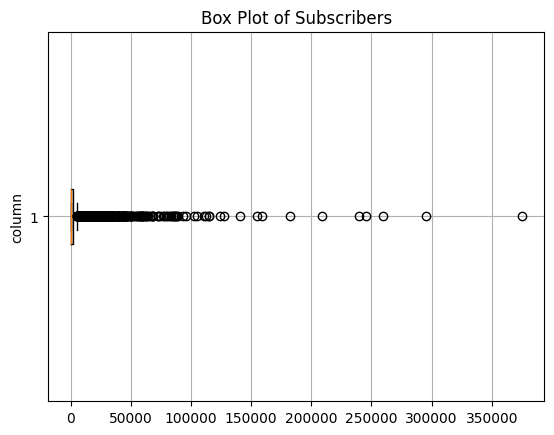

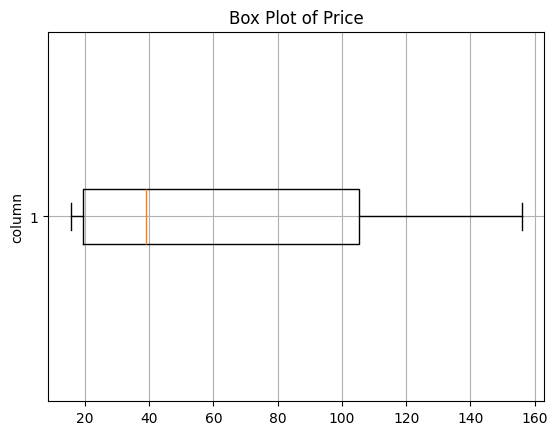

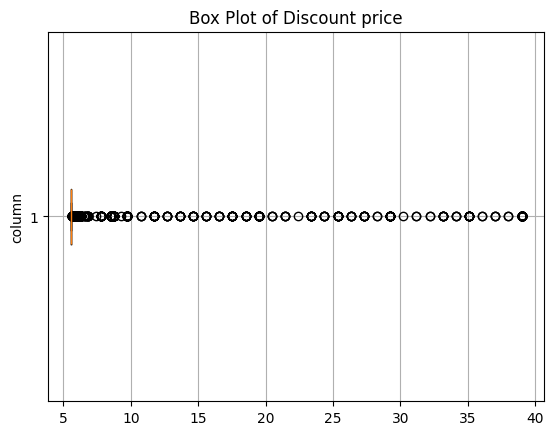

In [86]:
for column in numerical_columns:
    plt.boxplot(df[column],vert=False)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('column')
    plt.grid()
    plt.show()

## Calculating the standard deviation and mean for each feature

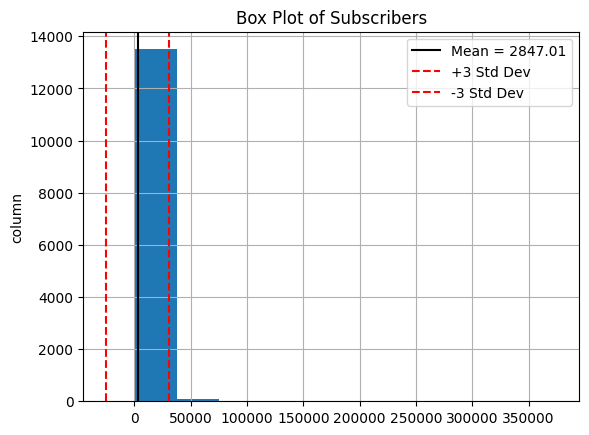

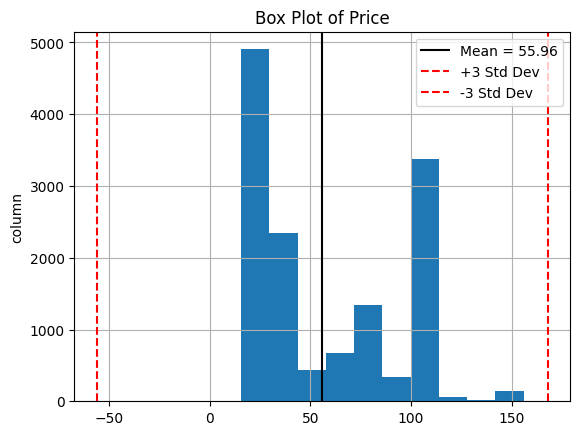

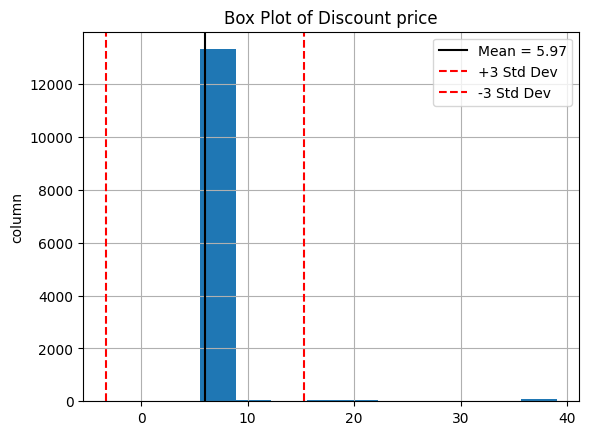

In [87]:
for column in numerical_columns:
    mu = df[column].mean()
    sigma = df[column].std()
    plt.hist(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('column')
    plt.axvline(mu, color="black", linestyle="solid", label=f"Mean = {mu:.2f}")
    plt.axvline(mu + 3 * sigma, color='red', linestyle="dashed", label=f"+{3} Std Dev")
    plt.axvline(mu - 3 * sigma, color='red', linestyle="dashed", label=f"-{3} Std Dev")
    plt.grid()
    plt.legend()
    plt.show()

## Calculating each outlier info

In [88]:
outlier_info = {}   # Creating an empty dictionary with key:value pair and each value has muliple sub-values for the same column

# Looping through the numerical columns to calculate mean, standard deviation, and outliers
for column in numerical_columns:
    mean_value = df[column].mean()
    std_dev = df[column].std()
    
    # Finding outliers using 3 standard deviations from the mean
    outliers = df[(df[column] < mean_value - 3 * std_dev) | (df[column] > mean_value + 3 * std_dev)]
    
    # Storing the details in the dictionary
    outlier_info[column] = {
        'mean': round(mean_value, 2),
        'std_dev': round(std_dev, 2),
        'num_outliers': len(outliers),
        'outlier_values': outliers[column].values.tolist()[:5]  # Show first 5 outliers
        }
    
# Iterating through the outlier_info dictionary and printing each column's details
for column in outlier_info:
    print(f"Outlier info for {column}:")
    print(f"  Mean: {outlier_info[column]['mean']}")
    print(f"  Standard Deviation: {outlier_info[column]['std_dev']}")
    print(f"  Number of Outliers: {outlier_info[column]['num_outliers']}")
    print(f"  Sample Outliers: {outlier_info[column]['outlier_values']}")
    print("-" * 50)

Outlier info for Subscribers:
  Mean: 2847.01
  Standard Deviation: 9437.87
  Number of Outliers: 155
  Sample Outliers: [295509, 209070, 155282, 245860, 374836]
--------------------------------------------------
Outlier info for Price:
  Mean: 55.96
  Standard Deviation: 37.32
  Number of Outliers: 0
  Sample Outliers: []
--------------------------------------------------
Outlier info for Discount price:
  Mean: 5.97
  Standard Deviation: 3.09
  Number of Outliers: 209
  Sample Outliers: [35.083296, 19.49072, 25.337936, 25.337936, 35.083296]
--------------------------------------------------


# Exporting the Cleaned data to a CSV file

In [ ]:
df.to_csv('cleaned_data.csv', index=False)      ## This function exports the cleaned data to a CSV file.

print("Data exported successfully as 'cleaned_data.csv'")

Data exported successfully as 'cleaned_data.csv'


# MySQL Implementation

## Creating a connection creation function

In [90]:
def create_connection():
    """Create and return a MySQL database connection and cursor."""
    
    # Establish the connection
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database=""        # Need to fill this path for the intended database
    )
    
    # Create a cursor
    conn = mydb.cursor()
    
    print("Connection to the database was successful.")
    print("≡" * 50)
    return mydb, conn       ## This function creates a connection to the MySQL database and returns the connection and cursor.

## Connecting the Database

In [91]:
mydb, conn = create_connection()

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡


## Database code

In [92]:
file_path = "cleaned_data.csv"

data = pd.read_csv(file_path)
data.columns

Index(['id', 'Title', 'is_paid', 'Subscribers', 'Average rating', 'Rating',
       'Num reviews', 'Lectures', 'created', 'Time', 'Discount price', 'Price',
       'Currency', 'Discount Percentage', 'Category'],
      dtype='object')

In [93]:
# Re-connecting to the database
mydb, conn = create_connection()

# Dropping the existing database if it exists and creating a new one
conn.execute("DROP DATABASE IF EXISTS Course_db")
conn.execute("CREATE DATABASE IF NOT EXISTS Course_db")
conn.execute("USE Course_db")

# Creating the table with the specified column names
create_sql = """
CREATE TABLE IF NOT EXISTS courses_table (
    id INT PRIMARY KEY,
    Title TEXT,
    is_paid BOOLEAN,
    Subscribers INT,
    `Average rating` FLOAT,
    Rating FLOAT,
    `Num reviews` INT,
    Lectures INT,
    created DATETIME,
    Time DATETIME,
    `Discount price` FLOAT,
    Price FLOAT,
    Currency TEXT,
    `Discount Percentage` FLOAT,
    Category TEXT
);
"""
conn.execute(create_sql)

conn.close()

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡


True

## Making the max allowed packet size larger so the process of data population becomes easier

In [94]:
# Seting the max_allowed_packet size to a larger value
mydb, conn = create_connection()
conn.execute("SET GLOBAL max_allowed_packet=64*1024*1024")  # Set to 64MB

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡


## Populating the Database with the data in our exported CSV file

In [95]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Inserting data into the MySQL table
insert_sql = """
INSERT INTO courses_table (id, Title, is_paid, Subscribers, `Average rating`, Rating, `Num reviews`, 
                                   Lectures, created, Time, `Discount price`, Price, Currency, `Discount Percentage`, Category)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

data_values = [
    (
        row['id'], row['Title'], row['is_paid'], row['Subscribers'], row['Average rating'],
        row['Rating'], row['Num reviews'], row['Lectures'],
        row['created'], row['Time'], row['Discount price'], row['Price'],
        row['Currency'], row['Discount Percentage'], row['Category']
    )
    for _, row in df.iterrows()
]

# Executing batch insert
conn.executemany(insert_sql, data_values)
mydb.commit()

print("Data successfully saved to the MySQL database.")

# Closing the connection
conn.close()
mydb.close()

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Data successfully saved to the MySQL database.


# Checking the Columns in order to Ensure consistency

In [96]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

conn.execute("DESCRIBE courses_table;")
columns = conn.fetchall()
print("Table columns:", columns)

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Table columns: [('id', 'int(11)', 'NO', 'PRI', None, ''), ('Title', 'text', 'YES', '', None, ''), ('is_paid', 'tinyint(1)', 'YES', '', None, ''), ('Subscribers', 'int(11)', 'YES', '', None, ''), ('Average rating', 'float', 'YES', '', None, ''), ('Rating', 'float', 'YES', '', None, ''), ('Num reviews', 'int(11)', 'YES', '', None, ''), ('Lectures', 'int(11)', 'YES', '', None, ''), ('created', 'datetime', 'YES', '', None, ''), ('Time', 'datetime', 'YES', '', None, ''), ('Discount price', 'float', 'YES', '', None, ''), ('Price', 'float', 'YES', '', None, ''), ('Currency', 'text', 'YES', '', None, ''), ('Discount Percentage', 'float', 'YES', '', None, ''), ('Category', 'text', 'YES', '', None, '')]


# MySQL Queries

## Sort and identify top courses by:

### Rating

In [97]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Sorting by Rating (Top 10 Courses)
Sort_by_Rating = """
SELECT Title, `Average rating`
FROM courses_table
ORDER BY `Average rating` DESC
LIMIT 10;
"""

# Execute the query
conn.execute(Sort_by_Rating)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Top 10 Courses by Rating:")
    print("-"*30)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Top 10 Courses by Rating:
------------------------------
('the ultimate technical  fundamental analysis', 5.0)
----------------------------------------------------------------------
('practical approach to corporate compliance', 5.0)
----------------------------------------------------------------------
('diy ethicalsustainable investing pays tutorial', 5.0)
----------------------------------------------------------------------
('12th accountancy cbse', 5.0)
----------------------------------------------------------------------
('how to present an offer so it gets accepted', 5.0)
----------------------------------------------------------------------
('persuasion psychology  influence  close the deal', 5.0)
----------------------------------------------------------------------
('design implement and update the collection policy', 5.0)
------------------------------------------------------------

### Number of subscribers (if available)


In [98]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Sorting by Subscribers (Top 10 Courses)
Sort_by_Subscribers = """
SELECT Title, Subscribers
FROM courses_table
ORDER BY Subscribers DESC
LIMIT 10;
"""

# Execute the query
conn.execute(Sort_by_Subscribers)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Top 10 Courses by Subscribers:")
    print("-"*30)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Top 10 Courses by Subscribers:
------------------------------
('an entire mba in 1 courseaward winning business school prof', 374836)
----------------------------------------------------------------------
('the complete sql bootcamp 2020 go from zero to hero', 295509)
----------------------------------------------------------------------
('stock market investing for beginners', 259888)
----------------------------------------------------------------------
('the complete financial analyst course 2020', 245860)
----------------------------------------------------------------------
('deep learning prerequisites the numpy stack in python v2', 239309)
----------------------------------------------------------------------
('tableau 2020 az handson tableau training for data science', 209070)
----------------------------------------------------------------------
('the complete financial analyst traini

### Discount percentage (created during preprocessing)

In [99]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Sorting by Discount Percentage (Top 10 Courses)
Sort_by_Discount_Percentage = """
SELECT Title, `Discount Percentage`
FROM courses_table
ORDER BY `Discount Percentage` DESC
LIMIT 10;
"""

# Execute the query
conn.execute(Sort_by_Discount_Percentage)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Top 10 Courses by Discount Percentage:")
    print("-"*40)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Top 10 Courses by Discount Percentage:
----------------------------------------
('sap fico financial accounting  management accounting', 94.74)
----------------------------------------------------------------------
('how to be an expert in piping components for oilgas career', 94.74)
----------------------------------------------------------------------
('101 hypnosis downloads get the life you desire with hypnosis', 94.74)
----------------------------------------------------------------------
('fintech  digital payments card  pos', 94.74)
----------------------------------------------------------------------
('financial management in tamil தமழ மழயல நத மலணம', 94.74)
----------------------------------------------------------------------
('amazon kindle ebook publishing  how to publish on kindle', 94.74)
----------------------------------------------------------------------
('lean six sigma gree

## Identify the most expensive courses


In [100]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Sorting by Discount Percentage (Top 10 Courses)
Sort_by_most_expensive = """
SELECT Title, price
FROM courses_table
ORDER BY price DESC
LIMIT 10;
"""

# Execute the query
conn.execute(Sort_by_most_expensive)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Top 10 Most Expensive Courses in USD: ")
    print("-"*40)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Top 10 Most Expensive Courses in USD: 
----------------------------------------
('demand and supply trading', 155.926)
----------------------------------------------------------------------
('learn to fix iphones and start a delivery service', 155.926)
----------------------------------------------------------------------
('professional trading with institutional supply  demand', 155.926)
----------------------------------------------------------------------
('a structured approach to financial valuation modelling', 155.926)
----------------------------------------------------------------------
('análise técnica de ativos', 155.926)
----------------------------------------------------------------------
('manage project cost', 155.926)
----------------------------------------------------------------------
('learn to trade the news', 155.926)
-----------------------------------------------------

## Group the data by category and calculate:

### Number of courses in each category


In [101]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Calculating the number of courses per price category 
Sort_by_price_category = """
SELECT Category, COUNT(*) AS num_courses
FROM courses_table
GROUP BY Category;
"""


# Execute the query
conn.execute(Sort_by_price_category)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Count of courses for each Price Category: ")
    print("-"*40)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Count of courses for each Price Category: 
----------------------------------------
('Business', 1450)
----------------------------------------------------------------------
('Communication', 71)
----------------------------------------------------------------------
('Data Science', 99)
----------------------------------------------------------------------
('Data Visualization', 129)
----------------------------------------------------------------------
('Database', 46)
----------------------------------------------------------------------
('Finance', 1119)
----------------------------------------------------------------------
('Leadership', 74)
----------------------------------------------------------------------
('Management', 523)
----------------------------------------------------------------------
('Other', 8685)
----------------------------------------------------------------------
('P

### Average number of reviews per category

In [102]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Calculating the average number of reviews per Price category
Sort_by_reviews_category = """
SELECT Category, AVG(`Num reviews`) AS avg_reviews
FROM courses_table
GROUP BY Category;
"""


# Execute the query
conn.execute(Sort_by_reviews_category)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Average Number of Reviews per Price Category: ")
    print("-"*50)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Average Number of Reviews per Price Category: 
--------------------------------------------------
('Business', Decimal('216.8503'))
----------------------------------------------------------------------
('Communication', Decimal('575.9155'))
----------------------------------------------------------------------
('Data Science', Decimal('264.2424'))
----------------------------------------------------------------------
('Data Visualization', Decimal('1497.5891'))
----------------------------------------------------------------------
('Database', Decimal('2757.6522'))
----------------------------------------------------------------------
('Finance', Decimal('250.3825'))
----------------------------------------------------------------------
('Leadership', Decimal('543.5541'))
----------------------------------------------------------------------
('Management', Decimal('244.9006'))
---------------

## Analyze discounts:

### Calculate average discount percentage offered per category

In [103]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Categorizing by Price Range
Sort_by_avg_discount_percentage = """
SELECT Category, AVG(`Discount Percentage`) AS avg_discount_percentage
FROM courses_table
GROUP BY Category;
"""


# Execute the query
conn.execute(Sort_by_avg_discount_percentage)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Average Discount Percentage Offered per Price Category: ")
    print("-"*50)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Average Discount Percentage Offered per Price Category: 
--------------------------------------------------
('Business', 79.20996546778186)
----------------------------------------------------------------------
('Communication', 72.00774636067135)
----------------------------------------------------------------------
('Data Science', 80.60272767808702)
----------------------------------------------------------------------
('Data Visualization', 83.43907011756602)
----------------------------------------------------------------------
('Database', 87.03478257552437)
----------------------------------------------------------------------
('Finance', 70.22241272640825)
----------------------------------------------------------------------
('Leadership', 74.1348652195286)
----------------------------------------------------------------------
('Management', 79.01759085281401)
------------------------

## Analyze price by paid/free status (if available):

### Calculate the median price for courses in each category.


In [104]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Categorizing paid and free courses based on 'is_paid' column
checking_for_paid_or_free = """
SELECT 
    CASE 
        WHEN is_paid = 0 THEN 'Free'
        WHEN is_paid = 1 THEN 'Paid'
    END AS Status, 
    COUNT(*) AS num_courses
FROM courses_table
GROUP BY Status;
"""

# Execute the query
conn.execute(checking_for_paid_or_free)

# Fetch the results
results = conn.fetchall()

# Check if any results are found and print them
if results:
    print("Paid / Free Category count: ")
    print("-"*50)
    for row in results:
        print(row)
        print("-"*70)
else:
    print("No results found.")

# Closing the connection
conn.close()
mydb.close()


Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Paid / Free Category count: 
--------------------------------------------------
('Free', 496)
----------------------------------------------------------------------
('Paid', 13112)
----------------------------------------------------------------------


As the Paid courses are the only ones I can actually calculate their median price value, since Free courses are free so their median would be zero. I will only calculate for the paid courses

In [105]:
# Re-connecting to the database
mydb, conn = create_connection()
conn.execute("USE Course_db")

# Categorizing paid and free courses based on 'is_paid' column
calculate_median = """
SELECT 
    price 
FROM courses_table 
WHERE is_paid = 1 AND price IS NOT NULL
ORDER BY price;
"""

# Execute the query
conn.execute(calculate_median)

# Fetch all the prices
prices = conn.fetchall()

# Calculate median
num_prices = len(prices)
if num_prices > 0:
    sorted_prices = [price[0] for price in prices]
    if num_prices % 2 == 1:  # Odd number of prices
        median_price = sorted_prices[num_prices // 2]
    else:  # Even number of prices
        median_price = (sorted_prices[num_prices // 2 - 1] + sorted_prices[num_prices // 2]) / 2
    print(f"Median Price for Paid Courses: {median_price}")
else:
    print("No valid price data found for Paid courses.")

# Closing the connection
conn.close()
mydb.close()

Connection to the database was successful.
≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡
Median Price for Paid Courses: 38.9814
